<div align = 'center' class='alert alert-success'>
    <h1>Pima Indians Diabetes</h1>
    </div>

# Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Setup
Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Loading

In [3]:
# Read the dataset
data = pd.read_csv('../data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.shape

(768, 9)

In [6]:
# see the column names and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### There are some values in Insulin, that cannot be zero. So, need to handle them by imputing

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### There is a huge variation in mean and 50% for Insulin, could be and outlier or missing data.Check for missing values in the datset inference  - Glucose , BP, Skin Thickness,BMI has 0 as min value, which is not possible, hence we can treat this as missingvalues and impute accordingly

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Let us check the columns that has '0' values in them

In [10]:
features = data.columns
cols = (data[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### It is observed that pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI has 0 value, which cannot be in realtime. hence either we need to handle them, as we cannot delete the rows, because there is very rows in dataset. Hence we need to do the imputation. As Glucose and BMI has very less missing values, we can use mean to replace 0.

In [11]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
#dataset.fillna(dataset.median(),inplace = True)
data['Glucose'].fillna(data['Glucose'].median(), inplace =True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace =True)
data['BMI'].fillna(data['BMI'].median(), inplace =True)

In [14]:
# impute Insulin values based on Glucose
by_Glucose_Age_Insulin_Grp = data.groupby(['Glucose'])
def fill_Insulin(series):
    return series.fillna(series.median())
data['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [15]:
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                      32
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())

In [17]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,277.500000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,49.000000,26.6,0.351,31,0
2,8,183.0,64.0,NaN,148.888587,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
5,5,116.0,74.0,NaN,105.000000,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.000000,31.0,0.248,26,1
7,10,115.0,72.0,NaN,118.000000,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.000000,30.5,0.158,53,1
9,8,125.0,96.0,NaN,121.000000,32.3,0.232,54,1


####  SkinThickness and BMI are having relation according to type 2 diabetes, hence we can consider inputing the values of skinthickness with respect to BMI and Insulin(optional)

In [18]:
by_BMI_Insulin = data.groupby(['BMI'])
def fill_Skinthickness(series):
    return series.fillna(series.mean())
data['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [19]:
data['SkinThickness'].isnull().sum()

32

In [20]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace= True)

In [21]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### See the distribution of the outcome variable

In [22]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


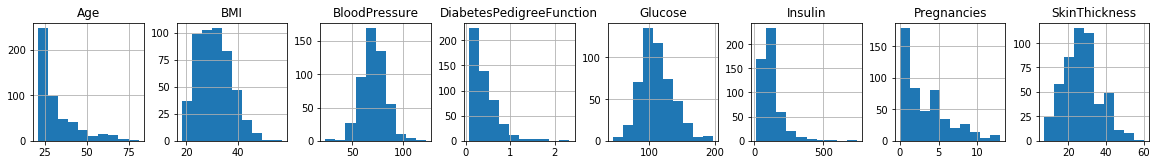

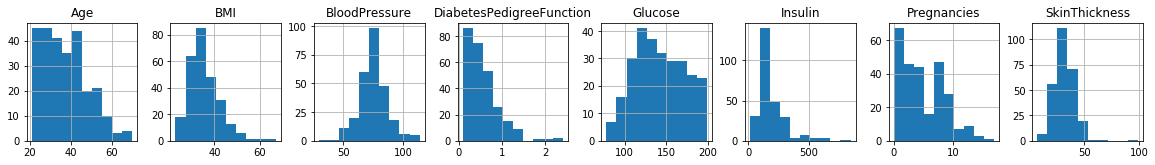

In [23]:
## See the variables with respect to outcome variable

data.groupby('Outcome').hist(figsize=(20,5),layout=(2,8),histtype='barstacked')
plt.show()

#### We can find differeces in Age, BMI,Glucose, Insulin,SkinThickness with respect to Outcomes.

In [24]:
correlation = data.corr()

In [25]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.064381,0.046741,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.188996,0.566640,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.183123,0.125499,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.064381,0.188996,0.183123,1.000000,0.210167,0.636708,0.128380,0.108672,0.232150
Insulin,0.046741,0.566640,0.125499,0.210167,1.000000,0.198895,0.114325,0.185146,0.279690
BMI,0.021559,0.231049,0.281257,0.636708,0.198895,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.128380,0.114325,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.108672,0.185146,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.232150,0.279690,0.312038,0.173844,0.238356,1.000000


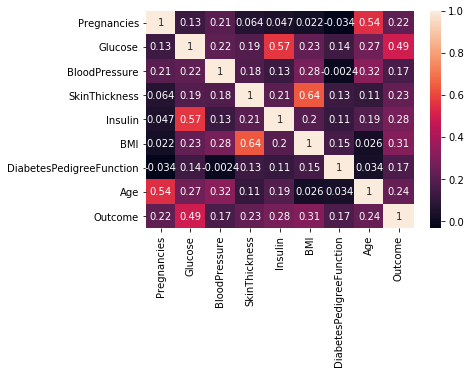

In [26]:
sns.heatmap(correlation,annot = True)

#### graph indicates a Glucose, Insulin, Age, BMI, Skinthickness are having good coorelation factor.

### Univariate Analysis

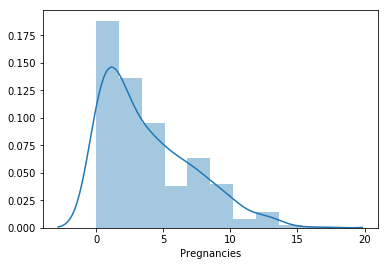

In [27]:
sns.distplot(data['Pregnancies'],bins=10)

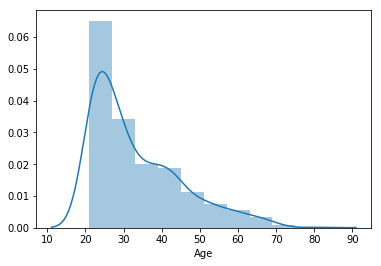

In [28]:
sns.distplot(data['Age'],bins=10)

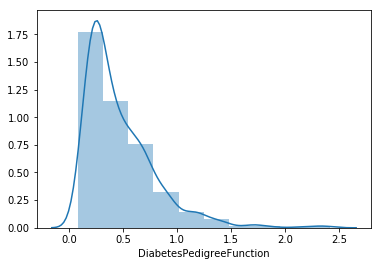

In [29]:
sns.distplot(data['DiabetesPedigreeFunction'],bins=10)

##### The distribution of data shows us that the data is mostly right skewed.

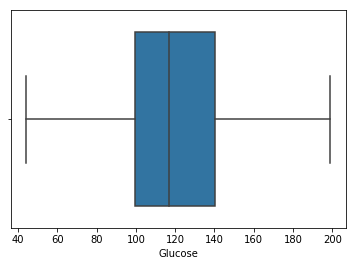

In [30]:
sns.boxplot(data['Glucose'])

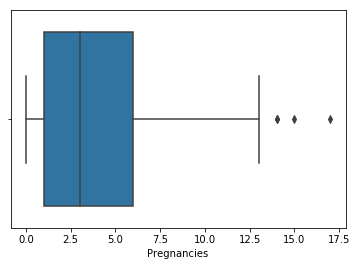

In [31]:
sns.boxplot(data['Pregnancies'])

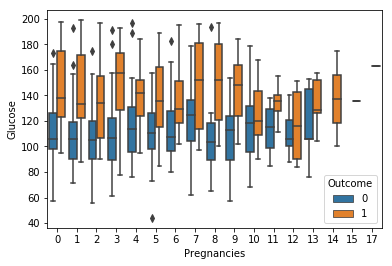

In [32]:
# Find the Glucose level in group of pregnant women who had diabetes.
sns.boxplot(x=data['Pregnancies'],y=data['Glucose'],hue=data['Outcome'])

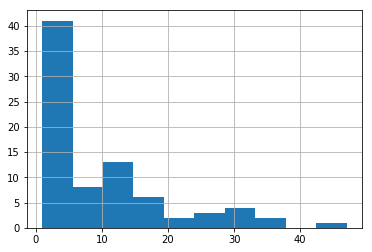

In [33]:
# How many pregnant women had BP?
data.groupby(['Outcome','BloodPressure']).Pregnancies.count().hist()
plt.show()

### Bi-Variate Analysis

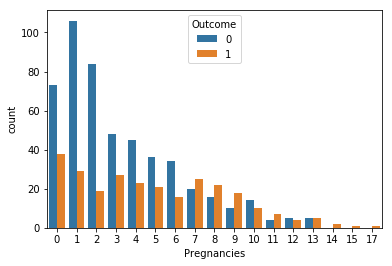

In [34]:
# To find max pregmancy women who were Diabetic
sns.countplot(data['Pregnancies'],hue=data['Outcome'])

#### pregnent women with 7-9 pregnancies were moslty diagonized as diabetic 

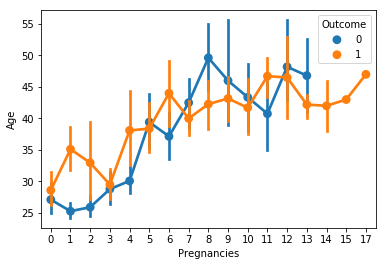

In [35]:
## Does Diabetes in Pregnancy depend on Age?
sns.pointplot(data['Pregnancies'],data['Age'],hue=data['Outcome'])

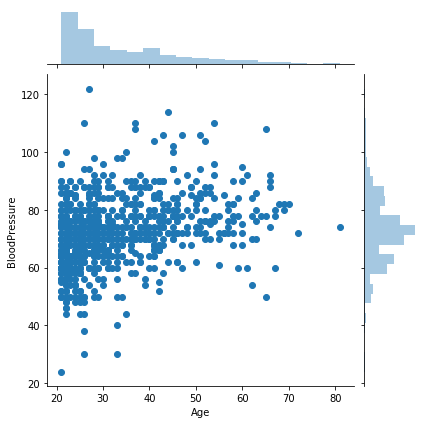

In [36]:
# is BP related to Age?
sns.jointplot('Age','BloodPressure',data=data)

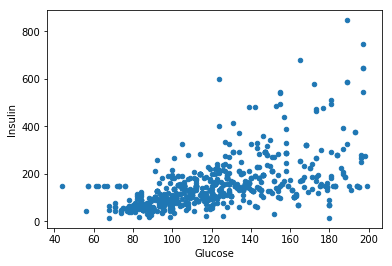

In [37]:
data.plot.scatter(x='Glucose', y='Insulin')

#### There is a increasing trend between Insulin and Glucose

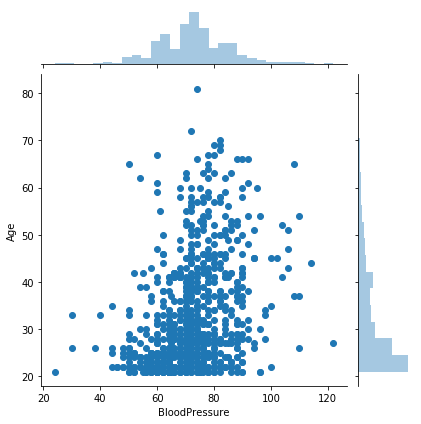

In [38]:
### Is BP related to Age?
sns.jointplot('BloodPressure','Age',data=data)

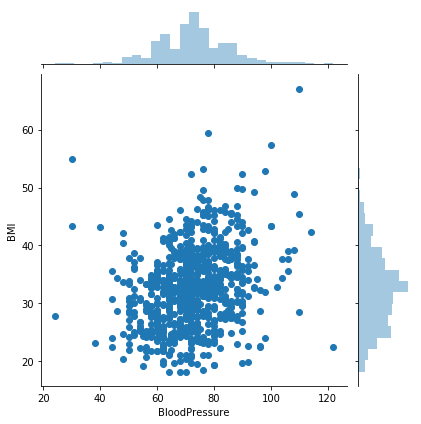

In [40]:
## Is BloodPressure related to BMI?
sns.jointplot(data['BloodPressure'],data['BMI'])

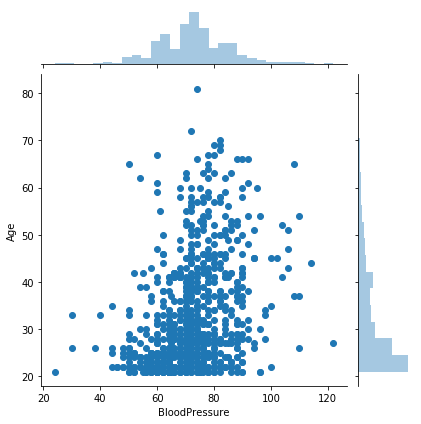

In [41]:
### Is BP related to Age?
sns.jointplot('BloodPressure','Age',data=data)

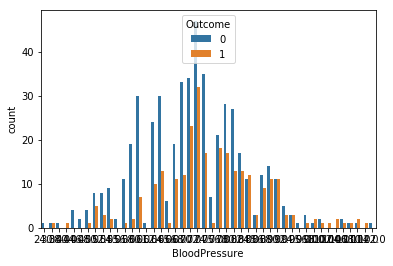

In [42]:
# influence of BloodPressure on Dabetic women
sns.countplot(x='BloodPressure',hue='Outcome',data=data)

# Data visualization and pre-processing

We need to visualize our data in order to get a better understanding before processing them.

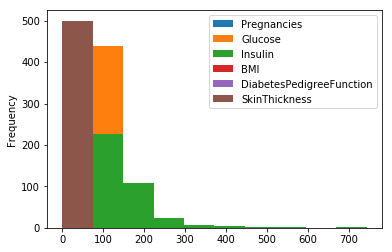

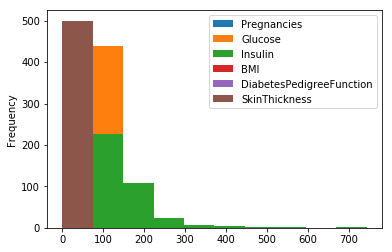

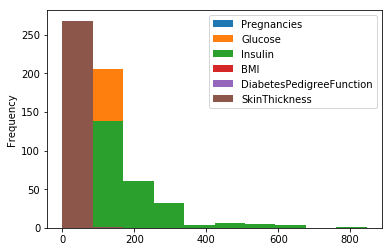

In [43]:
grouped_data=data.groupby('Outcome')[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']].plot.hist()

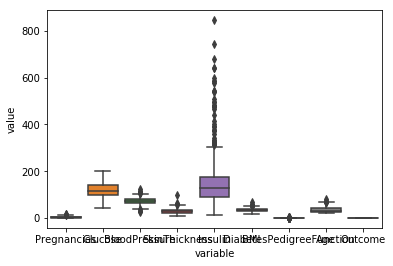

In [44]:
sns.boxplot(x="variable",y="value",data=pd.melt(data))

##### Find if there is linear relation ship between indpendent variables and outcome

In [45]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.064381,0.046741,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.188996,0.566640,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.183123,0.125499,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.064381,0.188996,0.183123,1.000000,0.210167,0.636708,0.128380,0.108672,0.232150
Insulin,0.046741,0.566640,0.125499,0.210167,1.000000,0.198895,0.114325,0.185146,0.279690
BMI,0.021559,0.231049,0.281257,0.636708,0.198895,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.128380,0.114325,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.108672,0.185146,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.232150,0.279690,0.312038,0.173844,0.238356,1.000000


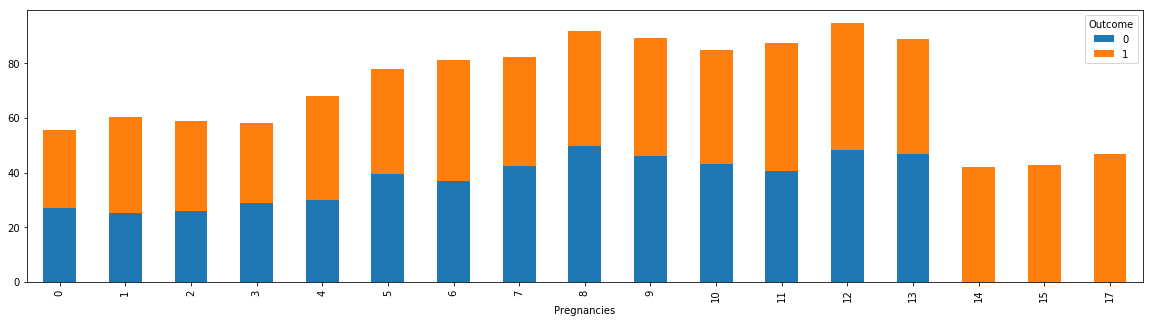

In [46]:
var = data.groupby(['Pregnancies','Outcome']).Age.mean()
var.unstack().plot(kind='bar',stacked=True,figsize=(20,5))

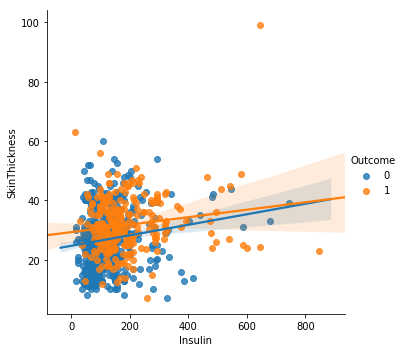

In [47]:
sns.lmplot('Insulin','SkinThickness',hue='Outcome',data=data)

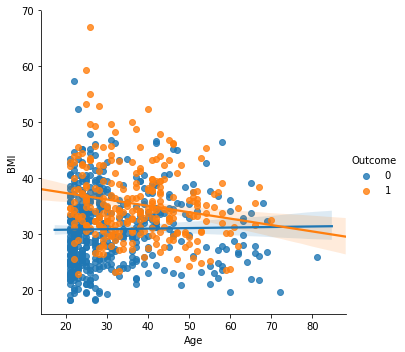

In [48]:
sns.lmplot('Age','BMI',hue='Outcome',data=data)

### Renaming feature's column

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
features = data.drop(['Outcome'],axis=1, inplace=False)
features = StandardScaler().fit_transform(features)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.866045,-0.031990,6.622055e-01,1.280900,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,3.993703e-02,-0.994836,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,1.473828e-15,0.000000,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-5.823314e-01,-0.546661,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,6.622055e-01,0.190339,1.549303,5.484909,-0.020496


In [51]:
target = data['Outcome']
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

Splitting our dataset before modelling

In [53]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [54]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (614, 8)
y_train (614,)
x_test (154, 8)
y_test (154,)


# Modelling

In [55]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import XGBClassifier


Training and finding accuracy_score & f1_score

In [86]:
# Model = []
# accuracy = []
# score_f1 = []

# mod_knn = KNeighborsClassifier(n_neighbors=92)
# mod_svc = SVC(kernel='linear')
# mod_LR = LogisticRegression()
# mod_GNB = GaussianNB()
# mod_RFC = RandomForestClassifier(n_jobs=-1)
# mod_DTC = DecisionTreeClassifier()
# # mod_XG = XGBClassifier()

# def training(mod_knn, mod_svc, mod_LR, mod_GNB, mod_RFC, mod_DTC):
    
#     mod_knn.fit(x_train,y_train)
#     accuracy.append(accuracy_score(y_test,mod_knn.predict(x_test)))
#     Model.append('KNN')
#     score_f1.append(f1_score(y_test,mod_knn.predict(x_test),average='weighted'))
    
#     mod_svc.fit(x_train,y_train)
#     accuracy.append(accuracy_score(y_test,mod_svc.predict(x_test)))
#     Model.append('SVC')
#     score_f1.append(f1_score(y_test,mod_svc.predict(x_test),average='weighted'))
    
#     mod_LR.fit(x_train,y_train)
#     accuracy.append(accuracy_score(y_test,mod_LR.predict(x_test)))
#     Model.append('Logistic Regression')
#     score_f1.append(f1_score(y_test,mod_LR.predict(x_test),average='weighted'))
    
#     mod_GNB.fit(x_train,y_train)
#     accuracy.append(accuracy_score(y_test,mod_GNB.predict(x_test)))
#     Model.append('GaussionNB')
#     score_f1.append(f1_score(y_test,mod_GNB.predict(x_test),average='weighted'))
    
#     mod_RFC.fit(x_train,y_train)
#     accuracy.append(accuracy_score(y_test,mod_RFC.predict(x_test)))
#     Model.append('RandomForestClassifier')
#     score_f1.append(f1_score(y_test,mod_RFC.predict(x_test),average='weighted'))
    
#     mod_DTC.fit(x_train,y_train)
#     accuracy.append(accuracy_score(y_test,mod_DTC.predict(x_test)))
#     Model.append('Decision Tree')
#     score_f1.append(f1_score(y_test,mod_DTC.predict(x_test),average='weighted'))
    
# #     mod_XG.fit(x_train,y_train)
# #     accuracy.append(accuracy_score(y_test,mod_XG.predict(x_test)))
# #     Model.append('XGBoost')
# #     score_f1.append(f1_score(y_test,mod_XG.predict(x_test),average='weighted'))
    
# training(mod_knn, mod_svc, mod_LR, mod_GNB, mod_RFC, mod_DTC)

# mod_dict = {
#     'Model':Model,
#     'Accuracy':accuracy,
#     'f1_score':score_f1
# }

# models = pd.DataFrame(mod_dict)
# models.set_index('Model')



In [87]:
model_dic = {
    "mod_knn" : KNeighborsClassifier(n_neighbors=92),
    "mod_svc" : SVC(kernel='linear'),
    "mod_LR" : LogisticRegression(),
    "mod_GNB" : GaussianNB(),
    "mod_RFC" : RandomForestClassifier(n_jobs=-1),
    "mod_DTC" : DecisionTreeClassifier(),
#     "mod_XG" : XGBClassifier()
}
Model={}
model_acc = {}
model_score_f1 = {}

def predict(model_dic):
    for key in model_dic:
        model_dic[key].fit(x_train,y_train)
        model_acc[key].append(accuracy_score(y_test,model_dic[key].predict(x_test)))
        model_score_f1[key].append(f1_score(y_test,model_dic[key].predict(x_test),average='weighted'))
        predict(model_dic)
        mod_dict = {
    'Model':Model,
    'Accuracy':accuracy,
    'f1_score':score_f1
}
models = pd.DataFrame(mod_dict)
models.set_index('Model')

,Accuracy,f1_score
Model,,
KNN,0.785714,0.777956
SVC,0.753247,0.751034
Logistic Regression,0.753247,0.751034
GaussionNB,0.772727,0.773996
RandomForestClassifier,0.740260,0.741254
Decision Tree,0.753247,0.751034


In [82]:
print(model_acc)

{}


<div class="alert alert-success">
    Tunning n_neighbors of <b>KNN model</b>
</div>

In [62]:

def knn(no):
    mod = KNeighborsClassifier(n_neighbors=no).fit(x_train,y_train)
    modp = mod.predict(x_test)
    return accuracy_score(y_test,modp)

In [63]:
knn_accuracy = []
knn_neighbors = []
for x in range(1,100):
    knn_accuracy.append(knn(x))
    knn_neighbors.append(x)


In [64]:
#Getting the n_neighbors with highest accuracy
high_neighbors = []
acc = []
for x in range(0,99):    
    if knn_accuracy[x] == float(pd.DataFrame(knn_accuracy).max()):
        high_neighbors.append(str(x+1))
        acc.append(float(pd.DataFrame(knn_accuracy).max()))

dict_high_neighbor = {
    'n_neighbors':high_neighbors,
    'accuracy_score':acc
}

neigh_frame = pd.DataFrame(dict_high_neighbor)
neigh_frame.set_index('n_neighbors')

,accuracy_score
n_neighbors,
64,0.792208
66,0.792208
68,0.792208
70,0.792208
71,0.792208
72,0.792208
73,0.792208
74,0.792208
75,0.792208


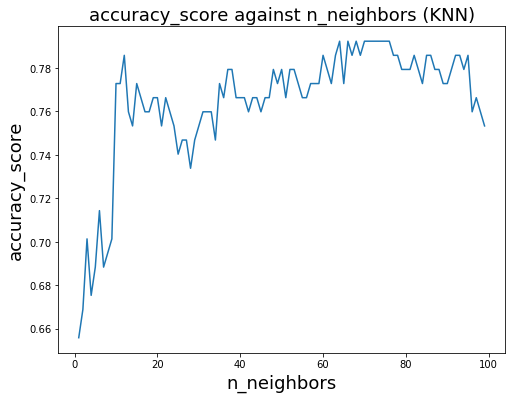

In [65]:
#Plot of accuracy_score against n_neigbors
fig, ax = plt.subplots(figsize=(8,6))
fig = plt.plot(knn_neighbors,knn_accuracy)
ax.set_xlabel('n_neighbors',fontsize=18)
ax.set_ylabel('accuracy_score',fontsize=18)
ax.set_title('accuracy_score against n_neighbors (KNN)',fontsize=18)
plt.show()

# Fine tunning and Model evaluation

<div class="alert alert-success">
    <b><h1>KNN model</h1></b>
    </div>

In [66]:
model = []
best_score = [] 
f1Score = []
score_accuracy = []

In [67]:

hyper_knn = {
    'n_neighbors':[28],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=hyper_knn,verbose=True,cv=10)
gs_knn.fit(x_train,y_train)

print(gs_knn.best_score_)
print(gs_knn.best_estimator_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7654723127035831
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=28, p=2,
           weights='uniform')


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.7s finished


In [68]:
best_score.append(gs_knn.best_score_)
model.append('KNN')
f1Score.append(f1_score(y_test,gs_knn.best_estimator_.predict(x_test),average='weighted'))
score_accuracy.append(accuracy_score(y_test,gs_knn.best_estimator_.predict(x_test)))

<div class="alert alert-success">
    <b><h1>Support Vector Classifier(SVC)</h1></b>
</div>

In [73]:
hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':['scale','auto'],
         'degree':[1,2,3,4,5,6,7,8,9,10],
         'class_weight':['balanced',None],
         'kernel':['rbf','linear','poly','sigmoid']
        }

gd=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)

gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5760 out of 5760 | elapsed:  9.5min finished


0.7703583061889251
SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [74]:
model.append('SVC')
best_score.append(gd.best_score_)
f1Score.append(f1_score(y_test,gd.best_estimator_.predict(x_test),average='weighted'))
score_accuracy.append(accuracy_score(y_test,gd.best_estimator_.predict(x_test)))

<div class="alert alert-success">
    <b><h1>Random Forest Classifier</h1></b>
</div>

In [419]:
ind = []
scr = []
def randome(n):
    modr = RandomForestClassifier(n_estimators=n,n_jobs=-1,max_features='sqrt').fit(x_train,y_train)
    modpr = modr.predict(x_test)
    accuracy_score(modpr,y_test)
    return accuracy_score(modpr,y_test)

for x in range(1,100):
    randome(x)
    ind.append(x)
    scr.append(randome(x))
ast = pd.DataFrame(scr)
print(ast.max())

0    0.824675
dtype: float64


In [430]:
ast.max()

0    0.824675
dtype: float64

In [414]:

hyper_rfc = {
    'n_estimators':[100],
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':[2,3,4,5],
    'n_jobs':[-1,1,2,3,4,5,6],
    'max_features':['auto','sqrt']
}

gs_rfc = GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper_rfc,verbose=True)
gs_rfc.fit(x_train,y_train)
print(gs_rfc.best_score_)
print(gs_rfc.best_estimator_)


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7817406370785018
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed: 23.6min finished


In [558]:
best_score.append(gs_rfc.best_score_)
model.append('RandomForestClassifier')
f1Score.append(f1_score(y_test,gs_rfc.best_estimator_.predict(x_test),average='weighted'))
score_accuracy.append(accuracy_score(y_test,gs_rfc.best_estimator_.predict(x_test)))

<div class="alert alert-success">
    <b><h1>Decision Tree Classifier</h1></b>
</div>

In [415]:

hyper_dtc = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,50),
    'min_samples_split':range(1,11),
    'min_samples_leaf':range(1,11),
    'max_features':['log2'],
}

gs_dtc = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=hyper_dtc,verbose=True)
gs_dtc.fit(x_train,y_train)

print(gs_dtc.best_score_)
print(gs_dtc.best_estimator_)


Fitting 5 folds for each of 19600 candidates, totalling 98000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 98000 out of 98000 | elapsed:  3.7min finished


0.7637878182060509
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [559]:
model.append('Decision Tree Classifier')
best_score.append(gs_dtc.best_score_)
f1Score.append(f1_score(y_test,gs_dtc.best_estimator_.predict(x_test),average='weighted'))
score_accuracy.append(accuracy_score(y_test,gs_dtc.best_estimator_.predict(x_test)))

<div class="alert alert-success">
    <b><h1>Logistic Regression</h1></b>
</div>

In [416]:

hyper_lr = {
    'penalty':['l1','l2','elasticnet','none'],
    'random_state':[42],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter':[120,130],
    'multi_class':['auto','ovr','multinomial'],
    'n_jobs':[-1],
    'fit_intercept':[True,False],
    'tol':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],
    'l1_ratio':[0,0.1,0.2,0.3,None]
}

gs_lr = GridSearchCV(estimator=LogisticRegression(),param_grid=hyper_lr,verbose=True)
gs_lr.fit(x_train,y_train)

print(gs_lr.best_score_)
print(gs_lr.best_estimator_)


Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 60000 out of 60000 | elapsed:  4.1min finished


0.7783953085432493
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=120,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='sag', tol=0.1, verbose=0, warm_start=False)


In [560]:
model.append('Logistic Regression')
best_score.append(gs_lr.best_score_)
f1Score.append(f1_score(y_test,gs_lr.best_estimator_.predict(x_test),average='weighted'))
score_accuracy.append(accuracy_score(y_test,gs_lr.best_estimator_.predict(x_test)))

<div class="alert alert-success">
    <b><h1>XGBOOST</h1></b>
</div>

In [ ]:
from xgboost import XGBClassifier as xg

In [548]:
hyper_xg = {
    'booster':['gbtree','gblinear','dart'],
    #'eta':[0,0.1,0.2,0.3,0.4,0.5],
    'max_depth':range(1,6),
    'gamma':range(0,100),
    'sampling_method':['uniform','gradient_based'],
    'max_features':['auto', 'log2', 'sqrt', 'None'],
    'criterion': ['gini', 'entropy']
}

gs_xgboost = GridSearchCV(estimator=xg(verbosity=0,random_state=125),param_grid=hyper_xg,verbose=True)
gs_xgboost.fit(x_train,y_train)

print(gs_xgboost.best_score_)
print(gs_xgboost.best_estimator_)

Fitting 5 folds for each of 24000 candidates, totalling 120000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120000 out of 120000 | elapsed: 41.2min finished


0.7703052112488338
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              max_features='auto', min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              random_state=125, reg_alpha=0, reg_lambda=1,
              sampling_method='uniform', scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [561]:
model.append('xgboost')
best_score.append(gs_xgboost.best_score_)
f1Score.append(f1_score(y_test,gs_xgboost.best_estimator_.predict(x_test),average='weighted'))
score_accuracy.append(accuracy_score(y_test,gs_xgboost.best_estimator_.predict(x_test)))

# Confusion matrices

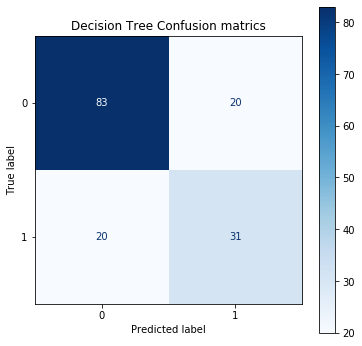

In [573]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
mat_dtc1 = plot_confusion_matrix(gs_dtc.best_estimator_,x_test,y_test,display_labels=['0','1'],cmap=plt.cm.Blues,ax=ax)
ax.set_title('Decision Tree Confusion matrics')
plt.show()

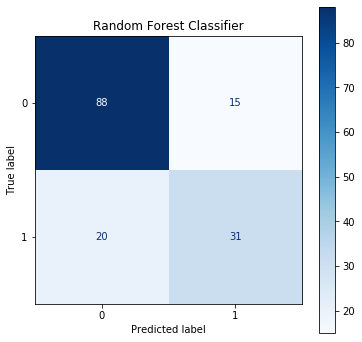

In [563]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
mat_rfc = plot_confusion_matrix(gs_rfc.best_estimator_,x_test,y_test,display_labels=['0','1'],cmap=plt.cm.Blues,ax=ax)
ax.set_title('Random Forest Classifier')
plt.show()

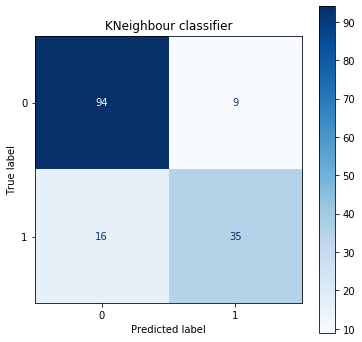

In [564]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
mat_rfc = plot_confusion_matrix(gs_knn.best_estimator_,x_test,y_test,display_labels=['0','1'],cmap=plt.cm.Blues,ax=ax)
ax.set_title('KNeighbour classifier')
plt.show()

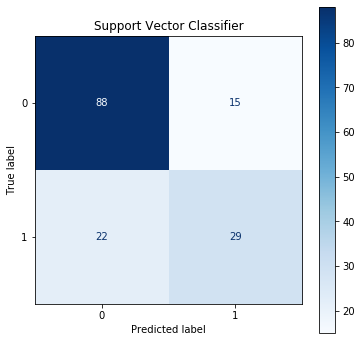

In [565]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
mat_rfc = plot_confusion_matrix(gd.best_estimator_,x_test,y_test,display_labels=['0','1'],cmap=plt.cm.Blues,ax=ax)
ax.set_title('Support Vector Classifier')
plt.show()

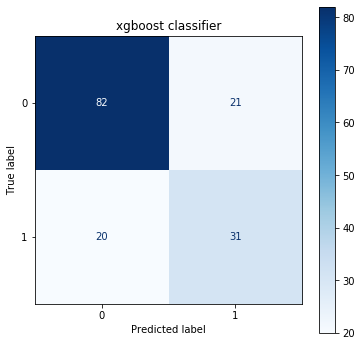

In [566]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
mat_rfc = plot_confusion_matrix(gs_xgboost.best_estimator_,x_test,y_test,display_labels=['0','1'],cmap=plt.cm.Blues,ax=ax)
ax.set_title('xgboost classifier')
bplt.show()

### Classification reports

In [576]:
from sklearn.metrics import classification_report

Decision Tree

In [574]:
print(classification_report(y_test,gs_dtc.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.61      0.61      0.61        51

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



Kneighbor classifier

In [575]:
print(classification_report(y_test,gs_knn.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       103
           1       0.80      0.69      0.74        51

    accuracy                           0.84       154
   macro avg       0.82      0.80      0.81       154
weighted avg       0.83      0.84      0.83       154



Support vector classifier

In [577]:
print(classification_report(y_test,gd.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       103
           1       0.66      0.57      0.61        51

    accuracy                           0.76       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



Random forest classifier

In [578]:
print(classification_report(y_test,gs_rfc.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       103
           1       0.67      0.61      0.64        51

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



Logistic Regression

In [579]:
print(classification_report(y_test,gs_lr.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       103
           1       0.69      0.57      0.62        51

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



xgboost classifier

In [580]:
print(classification_report(y_test,gs_xgboost.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       103
           1       0.60      0.61      0.60        51

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.73      0.73       154



In [567]:
dict_best_score = {
    'model':model,
    'best_score':best_score,
    'f1_score':f1Score,
    'accuracy_score':score_accuracy
}
pd_best_score = pd.DataFrame(dict_best_score)
pd_best_score

,model,best_score,f1_score,accuracy_score
0,KNN,0.726415,0.834349,0.837662
1,SVC,0.775210,0.754837,0.759740
2,RandomForestClassifier,0.781741,0.769563,0.772727
3,Decision Tree Classifier,0.763788,0.740260,0.740260
4,Logistic Regression,0.778395,0.766487,0.772727
5,xgboost,0.770305,0.734409,0.733766


# Saving Model

From above evaluation,it is found that knn model provides higher precision, f1_score and accuracy_score. Therefore our best model is Knn.

In [71]:
from sklearn.externals import joblib

In [72]:
joblib.dump(gs_knn.best_estimator_,"model.pkl")

['model.pkl']